In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data_untouched.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')
cleanedData

,Reported_Date,Description
0,2018-09-02,Burglary - Residence
1,2018-01-31,Forgery
2,2018-01-30,Sex Off Fondle - mol
3,2018-01-30,Burglary - Residence
4,2018-12-08,Property Damage
...,...,...
128933,2018-12-23,HOMICIDE/Non Neglige
128934,2018-12-27,Stealing Shoplifting
128935,2018-12-29,Burglary - Residence
128936,2018-12-25,Non Agg Assault Dome


# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()
totalByMonth_df

,Reported_Date
Reported_Date,
January,10191
February,8877
March,10796
April,10418
May,11693
June,11487
July,11489
August,11746
September,10879


In [8]:
summ = ['April', 'May','June','July','August', 'September']
wint = ['October', 'November', 'December', 'January', 'February', 'March']
summer = totalByMonth_df.loc[summ, :].sum()
winter = totalByMonth_df.loc[wint, :].sum()

In [9]:
season = pd.DataFrame({'Season': ['Summer', 'Winter'],
                      'Total' : [summer.get(key='Reported_Date'), winter.get(key='Reported_Date')]})

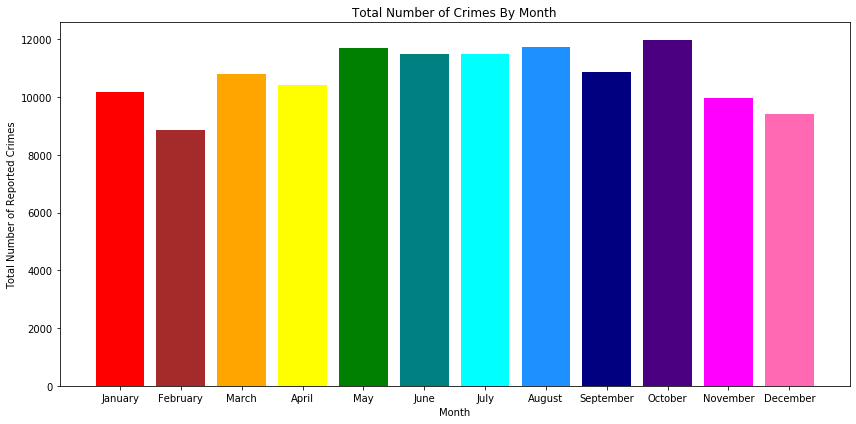

In [10]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(12,6))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Total Number of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.savefig('Images/Total Number of Crimes by Month')
plt.show()

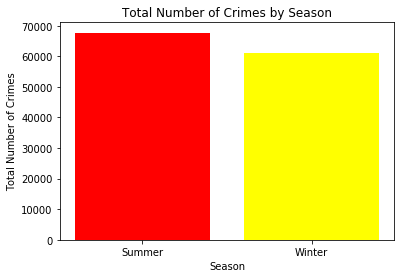

In [11]:
fig, ax1 = plt.subplots()
seasonalgraph =ax1.bar(x=season['Season'], height=season['Total'], color=['red', 'yellow'])
plt.xlabel('Season')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes by Season')
plt.savefig('Images/Total Number of Crimes by Season')
plt.show()

In [38]:
jan = cleanedData[cleanedData['Month'] == 'January']['Month'].count()
feb = cleanedData[cleanedData['Month'] == 'February']['Month'].count()
mar = cleanedData[cleanedData['Month'] == 'March']['Month'].count()
apr = cleanedData[cleanedData['Month'] == 'April']['Month'].count()
may = cleanedData[cleanedData['Month'] == 'May']['Month'].count()
jun = cleanedData[cleanedData['Month'] == 'June']['Month'].count()
jul = cleanedData[cleanedData['Month'] == 'July']['Month'].count()
aug = cleanedData[cleanedData['Month'] == 'August']['Month'].count()
sep = cleanedData[cleanedData['Month'] == 'September']['Month'].count()
Oct = cleanedData[cleanedData['Month'] == 'October']['Month'].count()
nov = cleanedData[cleanedData['Month'] == 'November']['Month'].count()
dec = cleanedData[cleanedData['Month'] == 'December']['Month'].count()
listw = [Oct, nov, dec, jan, feb, mar]
lists = [apr, may, jun, jul, aug, sep]
stats.f_oneway(listw, lists)
# listm

F_onewayResult(statistic=4.7627313142803835, pvalue=0.05402874268438566)

# By Season

In [39]:
seasonExcpected = (summer.get(key='Reported_Date') + winter.get(key='Reported_Date'))/2
seasonExcpected

64469.0

In [40]:
expected = pd.Series([seasonExcpected, seasonExcpected], index=['Summer', 'Winter'])
df = pd.DataFrame([expected]).T
df[1] = [summer.get(key='Reported_Date'), winter.get(key='Reported_Date')]
df.columns = ['expected', 'observed']
df

,expected,observed
Summer,64469.0,67712
Winter,64469.0,61226


In [41]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [42]:
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=326.26685693899395, pvalue=6.250067822587716e-73)

### Conclusion
 *Since the chi-square value is 326.3, which exceeds the critical value
 of 5.99, it can be concluded that the difference between the seasons is statistically significant, and because our p > 0.05, null hypothesis hold true, which is that months do not have any effect on the crime rate.

# By Quaters

In [43]:
q1 = jan+feb+mar
q2 = apr+may+jun
q3 = jul+aug+sep
q4 = Oct+nov+dec
observed = pd.Series([q1, q2, q3, q4], index=['Q1', 'Q2', 'Q3', 'Q4'])
expected = (q1+q2+q3+q4)/4
df2 = pd.DataFrame([observed]).T
df2[1] = [expected, expected, expected, expected]
df2.columns = ['observed', 'expected']
df2

,observed,expected
Q1,29864,32234.5
Q2,33598,32234.5
Q3,34114,32234.5
Q4,31362,32234.5


In [44]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [45]:
stats.chisquare(df2['observed'], df2['expected'])

Power_divergenceResult(statistic=365.2043307636228, pvalue=7.60815843778268e-79)

# By Month

In [46]:
observed = pd.Series([jan, feb, mar, apr, may, jun, jul, aug, sep, Oct,
                     nov, dec], index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                      'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                                      'Nov', 'Dec'])
expected = (q1+q2+q3+q4)/12
df3 = pd.DataFrame([observed]).T
df3[1] = [expected, expected, expected, expected, expected, expected, expected, 
        expected, expected, expected, expected, expected]
df3.columns = ['observed', 'expected']
df3

,observed,expected
Jan,10191,10744.833333
Feb,8877,10744.833333
Mar,10796,10744.833333
Apr,10418,10744.833333
May,11693,10744.833333
Jun,11487,10744.833333
Jul,11489,10744.833333
Aug,11746,10744.833333
Sep,10879,10744.833333
Oct,11990,10744.833333


In [47]:
critical_value = stats.chi2.ppf(q = 0.95, df = 11)
critical_value

19.67513757268249

In [48]:
stats.chisquare(df3['observed'], df3['expected'])

Power_divergenceResult(statistic=1011.3083497494919, pvalue=7.07197987961874e-210)

# Types of Crimes by Month

In [49]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy = copy.replace({'Agg Assault - Domest': 'Aggravated Assault', 'Aggravated Assault (': 'Aggravated Assault', 'Agg Assault': 'Aggravated Assault', 'agg assault': 'Aggravated Assault',
                     'AGG ASSAULT': 'Aggravated Assault', 'Agg Assault - Drive-': 'Aggravated Assault', 'agg assault': 'Aggravated Assault', 'Arson with Fire Bomb': 'Arson', 'HOMICIDE/Non Neglige': 'Homicide',
                    'Justifiable Homicide': 'Homicide', 'Non Agg Assault Dome': 'Non Aggravated Assault', 'non aggravated assau': 'Non Aggravated Assault','Non Aggravated Assau': 'Non Aggravated Assault', 
                     'Sex Off Follow/Entic': 'Sexual Assault', 'Sex Off Fondle - mol': 'Sexual Assault', 'Sex Off Incest': 'Sexual Assault', 'Sex Off Indecent Con': 'Sexual Assault', 'Sex Off Indecent Exp': 'Sexual Assault', 
                     'Sex Off Misconduct': 'Sexual Assault', 'Sex Offense -others': 'Sexual Assault', 'Sexual Assault with': 'Sexual Assault', 'Forcible Fondling': 'Sexual Assault', 'Kidnapping/Abduction': 'Kidnapping'})
copy = copy.replace({'Auto Theft Outside S': 'Auto Theft', 'Burglary - Non Resid': 'Burglary', 'Burglary - Residence': 'Burglary', 'Business Robbery': 'Robbery', 'property damage': 'Property Damage','Stealing All Other': 'Stealing',
                     'Stealing Auto Parts': 'Stealing', 'Stealing Auto Parts/': 'Stealing', 'Stealing Bicycles': 'Stealing', 'Stealing Coin Operat': 'Stealing', 'Stealing From Auto': 'Stealing', 'Stealing Pickpocket': 'Pickpocket', 
                     'Stealing Purse Snatc': 'Snatchning', 'Stealing Shoplifting': 'Shoplifting', 'Stealing from Buildi': 'Stealing', 'Stolen Property OFFE': 'Stolen Property', 'Strong Arm Robbery': 'Armed Robbery', 
                     'Withhold Property': 'Larceny', 'stealing': 'Stealing', 'stealing from buildi': 'Stealing'})
copy = copy.replace({'Accidental Drug Over': 'Drug Overdose', 'Driving Under Influe': 'DUI', 'Drunkenness': 'Misdemeanor', 'Hit and Run of a Per': 'Hit and Run', 'Human Trafficking/Co': 'Human Trafficking','Liquor Law Violaton': 'Violation',
                    'Disorderly Conduct': 'Misdemeanor', 'Bomb Threat/Intimida': 'Felony', 'Bombing (other than': 'Felony','False ID': 'Impersonation', 'False Information to': 'Impersonation','Impersonation - NOT': 'Impersonation', 'Gambling - Possessio': 'Gambling',
                    'Possession of Drug E': 'Possession of Drug', 'Possession/Sale/Dist': 'Possession of Drug', 'Resisting an Officer' : 'Misdemeanor', 'TRESPASS': 'Trespassing', 'Violation Ex Parte O': 'Violation', 'Violation Full Order': 'Violation', 'Possesion': 'Possession of Drug', 
                     'Weapons Law Violatio': 'Violation'})
copy = copy.replace({'Animal Bite - Dog': 'Animal Bite','Interference with Cu': 'Interference', 'Misc Offense': 'Misc', 'Misc Violation': 'Misc', 'misc violation': 'Misc', 'Promoting Prostituti': 'Prostitution', 'Prostitution/Patroni': 'Prostitution', 'Prostitution/Solicit': 'Prostitution',
                     'Suicide By Jumping': 'Suicide', 'Suicide By Shooting': 'Suicide', 'Suicide By Sleeping': 'Suicide', 'Suicide by Other Mea': 'Suicide', 'URINATE IN PUBLIC': 'Misdemeanor/Other','TRASH DUMPING': 'Misdemeanor/Other','`': 'Misc','misc': 'Misc', 'Attempt Suicide by D': 'Attempt Suicide',
                     'Attempt Suicide by G': 'Attempt Suicide', 'Attempt Suicide by H': 'Attempt Suicide', 'Attempt Suicide by J': 'Attempt Suicide', 'Attempt Suicide by O': 'Attempt Suicide', 'Attempt Suicide by P': 'Attempt Suicide', 'Attempt Suicide by S': 'Attempt Suicide', 'Attempt Suicide by C': 'Attempt Suicide'})
copy = copy.replace({ 'Passing Bad Checks' : 'Counterfeiting','Extortion/Blackmail': 'Blackmail','black mail': 'Blackmail', 'Fraud/Confidence Gam': 'Fraud', 'forgery': 'Forgery', 'Casualty (includes a': 'Casualty', 'Hacking/Computer Inv': 'Cybercrime', 'Dumping (littering)': 'Misdemeanor/Other', 'Missing/Runaway Juve': 'Missing',
                    'Suicide By Hanging': 'Suicide'})
copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sexual Assault,January
3,2018-01-30,Burglary,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,Homicide,December
128934,2018-12-27,Shoplifting,December
128935,2018-12-29,Burglary,December
128936,2018-12-25,Non Aggravated Assault,December


In [50]:
typesofCrime = copy.groupby(['Month','Description'])['Reported_Date'].count()

In [72]:
crime = pd.DataFrame(typesofCrime).reset_index()
copyCrime = pd.DataFrame(typesofCrime).reset_index()
copyCrime.set_index('Month', inplace=True)
copyCrime

,Description,Reported_Date
Month,,
April,Aggravated Assault,891
April,Armed Robbery,316
April,Arson,48
April,Attempt Suicide,7
April,Auto Theft,719
...,...,...
September,Stolen Property,78
September,Suicide,1
September,Trespassing,313


In [52]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,Aggravated Assault,Animal Bite,Animal Cruelty,Armed Robbery,Arson,Attempt Suicide,Auto Theft,Blackmail,Bribery,Burglary,...,Snatchning,Stalking,Statutory Rape,Stealing,Stolen Property,Suicide,Trespassing,Violation,Welfare Fraud,Wire Fraud
Month,,,,,,,,,,,,,,,,,,,,,
April,891.0,NaN,NaN,316.0,48.0,7.0,719.0,NaN,2.0,714.0,...,4.0,NaN,NaN,1796.0,54.0,2.0,287.0,222.0,NaN,13.0
August,916.0,NaN,NaN,582.0,49.0,7.0,913.0,NaN,NaN,813.0,...,9.0,NaN,8.0,2320.0,66.0,1.0,335.0,222.0,NaN,16.0
December,741.0,NaN,NaN,358.0,25.0,4.0,674.0,6.0,NaN,636.0,...,9.0,6.0,9.0,1781.0,66.0,1.0,295.0,139.0,NaN,11.0
February,617.0,NaN,NaN,275.0,35.0,6.0,834.0,NaN,NaN,597.0,...,4.0,8.0,14.0,1625.0,90.0,NaN,271.0,135.0,NaN,36.0
January,839.0,NaN,2.0,513.0,70.0,18.0,998.0,4.0,NaN,657.0,...,7.0,NaN,6.0,1915.0,99.0,2.0,226.0,185.0,NaN,35.0
July,951.0,NaN,NaN,493.0,45.0,10.0,848.0,10.0,NaN,821.0,...,4.0,6.0,8.0,2123.0,46.0,1.0,372.0,192.0,NaN,19.0
June,1072.0,1.0,5.0,429.0,36.0,10.0,848.0,2.0,NaN,692.0,...,2.0,8.0,4.0,2215.0,96.0,1.0,316.0,170.0,NaN,21.0
March,851.0,NaN,1.0,430.0,36.0,15.0,869.0,4.0,NaN,802.0,...,7.0,8.0,8.0,2045.0,83.0,2.0,355.0,160.0,NaN,10.0
May,947.0,NaN,NaN,426.0,33.0,7.0,919.0,6.0,NaN,800.0,...,6.0,8.0,5.0,2127.0,117.0,NaN,289.0,197.0,NaN,19.0


In [80]:
crime.columns

Index(['Month', 'Description', 'Reported_Date'], dtype='object')

# Personal Crime

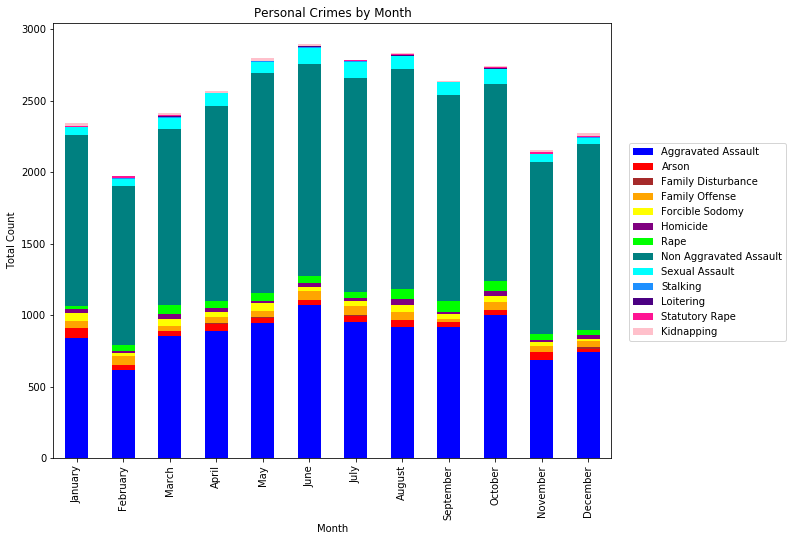

In [54]:
#Defining a list that contains the types of Personal Crimes
personalCrimes = ['Aggravated Assault', 'Arson', 'Family Disturbance', 'Family Offense', 'Forcible Sodomy', 
                  'Homicide', 'Rape','Non Aggravated Assault', 'Sexual Assault', 'Stalking', 'Loitering', 
                  'Statutory Rape', 'Kidnapping']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']

pCrimes = crime.loc[months, personalCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = pCrimes.legend(bbox_to_anchor=(1.15,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)

#Setting title, x-label and y-label
pCrimes.set_title('Personal Crimes by Month')
pCrimes.set_xlabel('Month')
pCrimes.set_ylabel('Total Count')
plt.show()

In [55]:
fig = pCrimes.get_figure()
fig.savefig('Images/Personal Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')

# Property Crime 

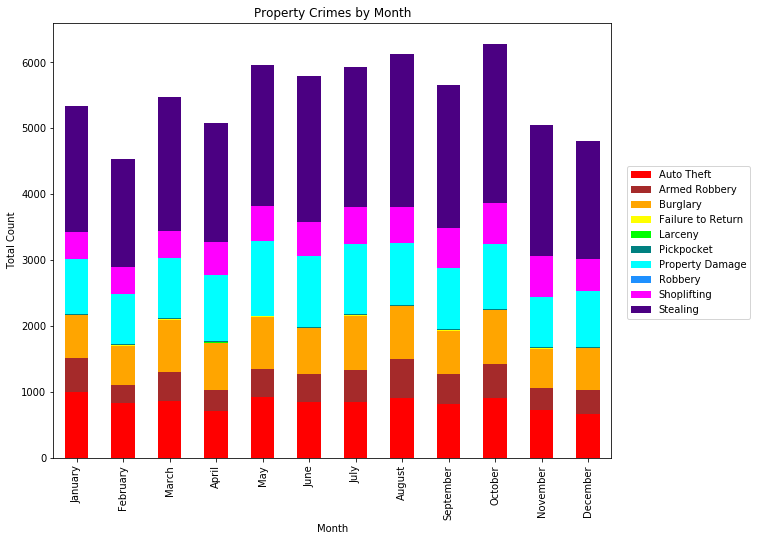

In [56]:
propertyCrimes = ['Auto Theft', 'Armed Robbery', 'Burglary', 'Failure to Return', 'Larceny', 'Pickpocket', 'Property Damage',
                 'Robbery', 'Shoplifting', 'Stealing']
Col =['red', 'brown', 'orange', 'yellow', 'lime', 'teal', 'cyan', 'dodgerblue', 'magenta','indigo']
propCrimes = crime.loc[months, propertyCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = propCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)


#Setting title, x-label and y-label
propCrimes.set_title('Property Crimes by Month')
propCrimes.set_xlabel('Month')
propCrimes.set_ylabel('Total Count')
plt.show()

In [57]:
fig = propCrimes.get_figure()
fig.savefig('Images/Property Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')

In [100]:
stealingWinter = crime[(crime['Month'] == 'October') & (crime['Description'] == 'Stealing')]
x = stealingWinter.iloc[0]['Reported_Date']
totalWinter = x
stealingWinter = crime[(crime['Month'] == 'November') & (crime['Description'] == 'Stealing')]
x = stealingWinter.iloc[0]['Reported_Date']
totalWinter = totalWinter + x
stealingWinter = crime[(crime['Month'] == 'January') & (crime['Description'] == 'Stealing')]
x = stealingWinter.iloc[0]['Reported_Date']
totalWinter = totalWinter + x
stealingWinter = crime[(crime['Month'] == 'February') & (crime['Description'] == 'Stealing')]
x = stealingWinter.iloc[0]['Reported_Date']
totalWinter = totalWinter + x
stealingWinter = crime[(crime['Month'] == 'March') & (crime['Description'] == 'Stealing')]
x = stealingWinter.iloc[0]['Reported_Date']
totalWinter = totalWinter + x

stealingSummer = crime[(crime['Month'] == 'April') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = x
stealingSummer = crime[(crime['Month'] == 'May') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = totalSummer + x
stealingSummer = crime[(crime['Month'] == 'June') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = totalSummer + x
stealingSummer = crime[(crime['Month'] == 'July') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = totalSummer + x
stealingSummer = crime[(crime['Month'] == 'August') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = totalSummer + x
stealingSummer = crime[(crime['Month'] == 'September') & (crime['Description'] == 'Stealing')]
x = stealingSummer.iloc[0]['Reported_Date']
totalSummer = totalSummer + x

12752

In [101]:
df4 = pd.DataFrame({'Season': ['Summer', 'Winter'],
                   'Total': [totalSummer, totalWinter]})
df4

,Season,Total
0,Summer,12752
1,Winter,9982


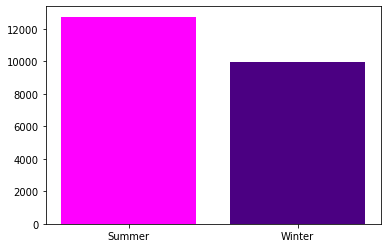

In [103]:
typeSeason = plt.bar(x = df4['Season'], height = df4['Total'], color=['magenta', 'indigo'])
plt.title('Stealing by Season')
plt.ylabel('Total')
plt.show()

# Statutory Crime

In [ ]:
statutoryCrimes = ['DUI', 'Misdemeanor', 'Hit and Run','Drug Overdose', 'Human Trafficking', 'Violation', 'Felony', 'Impersonation',
                  'Gambling', 'Identity Theft', 'Intimidation', 'Possession of Drug']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
statCrimes = crime.loc[months, statutoryCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = statCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)


#Setting title, x-label and y-label
statCrimes.set_title('Statutory Crimes by Month')
statCrimes.set_xlabel('Month')
statCrimes.set_ylabel('Total Count')
plt.show()

In [ ]:
fig = statCrimes.get_figure()
fig.savefig('Images/Statutory Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')

# Financial Crime

In [ ]:
financialCrimes = ['Counterfeiting', 'Embezzlement', 'Blackmail', 'Fraud', 'Welfare Fraud', 'Forgery', 'Wire Fraud']
Col =['blue', 'red', 'brown', 'orange', 'yellow','purple', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
finanCrimes = crime.loc[months, financialCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = finanCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)


#Setting title, x-label and y-label
finanCrimes.set_title('Financial Crimes by Month')
finanCrimes.set_xlabel('Month')
finanCrimes.set_ylabel('Total Count')
plt.show()

In [ ]:
fig = finanCrimes.get_figure()
fig.savefig('Images/Financial Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')

# Other Crimes

In [ ]:
otherCrimes = ['Casualty', 'Dead Body', 'Animal bite', 'Animal Cruelty', 'Credit/Debit/ATM Car', 'Curfew', 'Cybercrime', 'Misdemeanor/Other',
              'Attempt Suicide', 'Suicide', 'Misc', 'Missing', 'Pornography', 'Prostitution', 'Interference']
Col =['black', 'chocolate', 'orange', 'yellow','purple', 'blue', 'red', 'brown', 'lime', 'teal', 'cyan', 'dodgerblue', 'indigo','deeppink', 'pink']
othCrimes = crime.loc[months, otherCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
lgd = othCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)

#Setting title, x-label and y-label
othCrimes.set_title('Other Crimes by Month')
othCrimes.set_xlabel('Month')
othCrimes.set_ylabel('Total Count')
plt.show()

In [ ]:
fig = othCrimes.get_figure()
fig.savefig('Images/Other Crimes by Month',bbox_extra_artists=(lgd, text), bbox_inches='tight')